In [1]:
# load data from imdb, split into testing/training data

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
len(train_data)

25000

In [3]:
len(test_data)

25000

In [4]:
# taking a look at the training data which are a list of word indices
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# looking at the labels themselves for each datapoint - 1 = positive review, 0 = negative review
train_labels[0]

1

In [6]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [7]:
test_labels[0]

0

In [8]:
# since the num_words argument in the imdb.load_data call is 10,000 this is showing that the highest word index be 9,999
max([max(sequence) for sequence in train_data])

9999

In [9]:
# how to decode the reviews back into readable English text
word_index = imdb.get_word_index() #a disctionary mapping words to an integer index
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]) # reversing the word index to map integer indices to words
decoded_review = " ".join(
    [reverse_word_index.get(i -3, "?") for i in train_data[0]]) # decoding the review which needs to be offset by 3 because the first 3 indices are not what we want "padding", "start of sequence" and "unknown"

1641221/1641221 [==============================] - 0s 0us/step


In [10]:
# turning our lists of integers (train_data/test_data) into lists of tensors using multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # creating a matrix of all zeros
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1 
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
# taking a peek at what the training data looks like now

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# vectorize labels as well

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
# set up our model using three layers, 2 with 16 units and the final layer with 1 unit

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [15]:
# compiling the model

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
# splitting the testing & training data into partials

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# training the model

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 29ms/step - loss: 0.5365 - accuracy: 0.7631 - val_loss: 0.4032 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3311 - accuracy: 0.8927 - val_loss: 0.3160 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2445 - accuracy: 0.9209 - val_loss: 0.2835 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1978 - accuracy: 0.9347 - val_loss: 0.2752 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1660 - accuracy: 0.9441 - val_loss: 0.2795 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1407 - accuracy: 0.9541 - val_loss: 0.2904 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1216 - accuracy: 0.9605 - val_loss: 0.3226 - val_accuracy: 0.8737
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

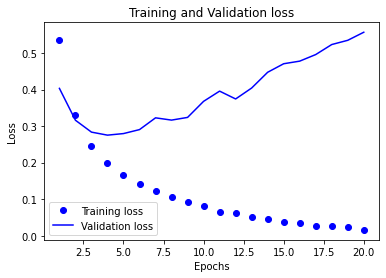

In [19]:
# plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

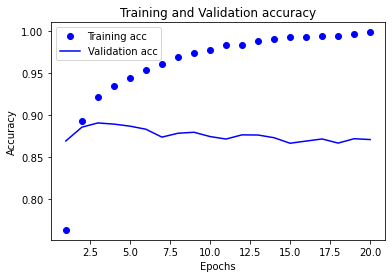

In [20]:
# plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# Training the model from scratch again but this time with only 4 epochs to avoid overfitting

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4940 - accuracy: 0.8084
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2949 - accuracy: 0.8976
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2275 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8892


In [22]:
# take a peek at the results

results

[0.27892953157424927, 0.8891599774360657]

In [23]:
# using the trained model to generate predictions on new data

model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.22545916],
       [0.99991524],
       [0.8701235 ],
       ...,
       [0.10658713],
       [0.08698383],
       [0.5201607 ]], dtype=float32)